In [1]:
with open('unids.txt', 'r') as f:
    unids = [i.replace('\n', '') for i in f]

with open('all_ids.txt', 'r') as f:
    ids = [i.replace('\n', '') for i in f]

import json

with open('pa-data-gp-aas.json', 'r') as f:
    data = json.load(f)

from plot_util import *

In [2]:
#STRUCTURAL AAS (from Viper)

aa_freq_total = {}
for i in ids:
    if i in data['aas']:
        for k in data['aas'][i]:
            if k in aa_freq_total: aa_freq_total[k] += data['aas'][i][k]
            else: aa_freq_total[k] = data['aas'][i][k]


aa_freq_un = {}
for i in unids:
    if i in data['aas']:
        for k in data['aas'][i]:
            if k in aa_freq_un: aa_freq_un[k] += data['aas'][i][k]
            else: aa_freq_un[k] = data['aas'][i][k]


gp_aa_freq_un = {}
for i in unids:
    if i in data['data'] and 'closest_gp_aa' in data['data'][i].keys():
        caa = data['data'][i]['closest_gp_aa']
        if caa not in gp_aa_freq_un: gp_aa_freq_un[caa] = 0
        gp_aa_freq_un[caa] += 1

#piegraph(aa_freq_total, 'aa frequency over all viruses')

#piegraph(aa_freq_un, 'aa frequency over unique viruses')

In [3]:
id_gp = {v: data['data'][v]['gauge_point'] for v in ids if 'gauge_point' in data['data'][v].keys()}
gplist = list(set(id_gp.values()))
gplist = [str(i) for i in sorted([int(g) for g in gplist])]

In [4]:
aalist = ['HIS',
 'ILE',
 'ASP',
 'ALA',
 'PHE',
 'ASN',
 'GLY',
 'SER',
 'GLU',
 'TRP',
 'MET',
 'THR',
 'CYS',
 'ARG',
 'PRO',
 'LYS',
 'UNK',
 'VAL',
 'GLN',
 'TYR',
 'LEU']

In [5]:
gp_aa_dict = {}
for g in gplist:
    gp_aa_dict[g] = {a:0 for a in aalist}
    for i in ids:
        if i in id_gp and id_gp[i] == g and 'closest_gp_aa' in data['data'][i].keys():
            caa = data['data'][i]['closest_gp_aa']
            if caa not in gp_aa_dict[g]: gp_aa_dict[g][caa] = 0
            gp_aa_dict[g][caa] += 1

In [6]:
gp_aa_dict_un = {}
for g in gplist:
    gp_aa_dict_un[g] = {a:0 for a in aalist}
    for i in unids:
        if i in id_gp and id_gp[i] == g and 'closest_gp_aa' in data['data'][i].keys():
            caa = data['data'][i]['closest_gp_aa']
            if caa not in gp_aa_dict_un[g]: gp_aa_dict_un[g][caa] = 0
            gp_aa_dict_un[g][caa] += 1


In [7]:
id_genome = {k:v['genome'] if v['genome'] != '' else 'NA' for k,v in data['data'].items() if 'genome' in v}

In [8]:
genome_gp_aa_dict = {}
for g in list(set(id_genome.values())):
    genome_gp_aa_dict[g] = {}
    id_pool = [i for i in unids if i in id_genome and id_genome[i] == g]
    for gp in gplist:
        genome_gp_aa_dict[g][gp] = {a:0 for a in aalist}
        for i in id_pool:
            if i in id_gp and id_gp[i] == gp and 'closest_gp_aa' in data['data'][i]:
                caa = data['data'][i]['closest_gp_aa']
                if caa not in genome_gp_aa_dict[g][gp]: genome_gp_aa_dict[g][gp][caa] = 0
                genome_gp_aa_dict[g][gp][caa] += 1

In [17]:
for v in data['data']:
    if 'genome' in data['data'][v] and data['data'][v]['genome'] == 'dsDNA' and v in id_gp and id_gp[v] == '18':
        if v in unids: print(v)

6ygh


In [9]:
import pandas as pd

In [10]:
for k,v in genome_gp_aa_dict.items():
    df = pd.DataFrame.from_dict(v)
    df.to_excel(f"{k}_aas_unique.xlsx")

In [129]:
total_df = pd.DataFrame.from_dict(gp_aa_dict)

In [130]:
df = pd.DataFrame.from_dict(gp_aa_dict_un)

In [131]:
df.to_excel('gp_aas_unique.xlsx')

In [132]:
total_df.to_excel('gp_aas_total.xlsx')

In [42]:
unk_aas = []
gp_aa_freq_total = {}
for i in ids:
    if i in data['data'] and 'closest_gp_aa' in data['data'][i].keys():
        caa = data['data'][i]['closest_gp_aa']
        if caa == 'UNK': unk_aas.append(i)
        if caa not in gp_aa_freq_total: gp_aa_freq_total[caa] = 0
        gp_aa_freq_total[caa] += 1

In [43]:
unk_aas

['1tnv', '4c0u', '4c0y', '4c10', '6q0b', '7od8', '7oen', '7oev']

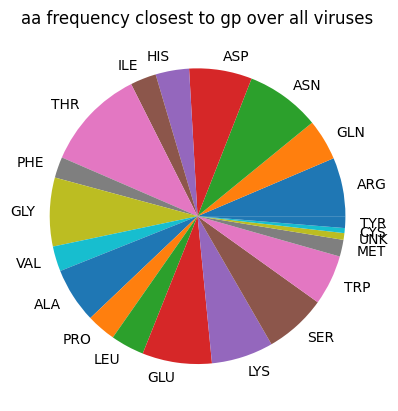

In [35]:
piegraph(gp_aa_freq_total, 'aa frequency closest to gp over all viruses')

In [39]:
gp_aa_freq_un = {}
for i in unids:
    if i in data['data'] and 'closest_gp_aa' in data['data'][i].keys():
        caa = data['data'][i]['closest_gp_aa']
        if caa not in gp_aa_freq_un: gp_aa_freq_un[caa] = 0
        gp_aa_freq_un[caa] += 1

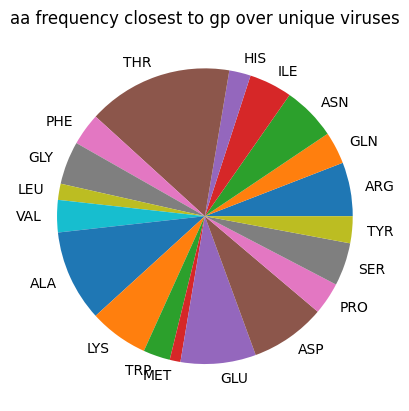

In [41]:
piegraph(gp_aa_freq_un, 'aa frequency closest to gp over unique viruses')

In [ ]:

#divide by max to normalize
tm = max(aa_freq_total.values())
aa_freq_total_norm = {k:v/tm for k,v in aa_freq_total.items()}

um = max(aa_freq_un.values())
aa_freq_un_norm = {k:v/um for k,v in aa_freq_un.items()}

diff = {k: aa_freq_total_norm[k] - (aa_freq_un_norm[k] if k in aa_freq_un_norm else 0) for k in aa_freq_total_norm}

#diff sorted by magnitude; positive means all_ids had more & negative means unids had more
#dict(sorted(diff.items(), key=lambda item: abs(item[1])))


diff_abs = {k: abs(aa_freq_total_norm[k] - (aa_freq_un_norm[k] if k in aa_freq_un_norm else 0)) for k in aa_freq_total_norm}

n = 10 # number of aas to show
diff_abs_topn = dict(sorted(diff_abs.items(), key=lambda item: item[1])[-n:])
piegraph(diff_abs_topn, f'top {n} aas with largest difference in normalized frequency between unique and all viruses')

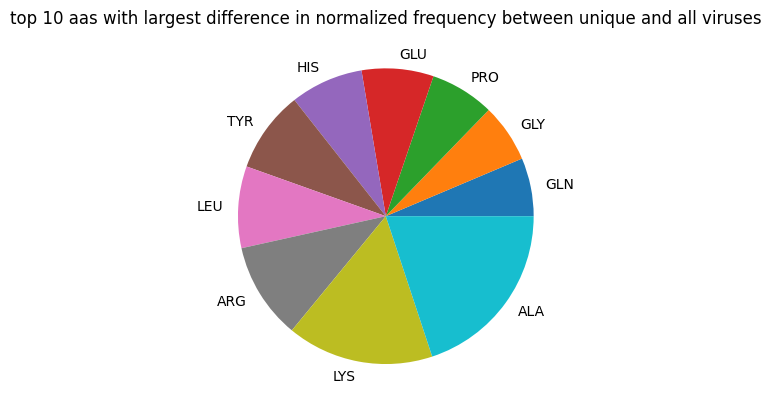

In [13]:
#CLOSE AAS (output from find_aas)

aa_freq_total = {}
for i in ids:
    if i in data['close_aas']:
        for k in data['close_aas'][i]:
            if k in aa_freq_total: aa_freq_total[k] += data['close_aas'][i][k]
            else: aa_freq_total[k] = data['close_aas'][i][k]


aa_freq_un = {}
for i in unids:
    if i in data['close_aas']:
        for k in data['close_aas'][i]:
            if k in aa_freq_un: aa_freq_un[k] += data['close_aas'][i][k]
            else: aa_freq_un[k] = data['close_aas'][i][k]


tm = max(aa_freq_total.values())
aa_freq_total_norm = {k:v/tm for k,v in aa_freq_total.items()}

um = max(aa_freq_un.values())
aa_freq_un_norm = {k:v/um for k,v in aa_freq_un.items()}

diff = {k: aa_freq_total_norm[k] - (aa_freq_un_norm[k] if k in aa_freq_un_norm else 0) for k in aa_freq_total_norm}

#diff sorted by magnitude; positive means all_ids had more & negative means unids had more
#dict(sorted(diff.items(), key=lambda item: abs(item[1])))

#piegraph(aa_freq_total, 'aa frequency over all viruses')

#piegraph(aa_freq_un, 'aa frequency over unique viruses')

diff_abs = {k: abs(aa_freq_total_norm[k] - (aa_freq_un_norm[k] if k in aa_freq_un_norm else 0)) for k in aa_freq_total_norm}

n = 10 # number of aas to show
diff_abs_topn = dict(sorted(diff_abs.items(), key=lambda item: item[1])[-n:])
piegraph(diff_abs_topn, f'top {n} aas with largest difference in normalized frequency between unique and all viruses')